In [1]:
# rm(list=ls())
options(OutDec = ",") 
#===================================================================
# Construindo exemplo com dados artificiais.
#===================================================================
set.seed(1234)
n      <- 1000
beta0  <- 2
beta1  <- 3
x      <- rnorm(n)
y      <- beta0 + beta1*x  + rt(n,4)

In [2]:
#===================================================================
# Nas análises abaixo, você deve ignorar o conhecimento do processo
# gerador dos dados. 
#===================================================================
# Teste de correlação
#===================================================================
print(cor.test(x,y))


	Pearson's product-moment correlation

data:  x and y
t = 71,02, df = 998, p-value < 2,2e-16
alternative hypothesis: true correlation is not equal to 0
95 percent confidence interval:
 0,9028292 0,9233753
sample estimates:
      cor 
0,9136841 



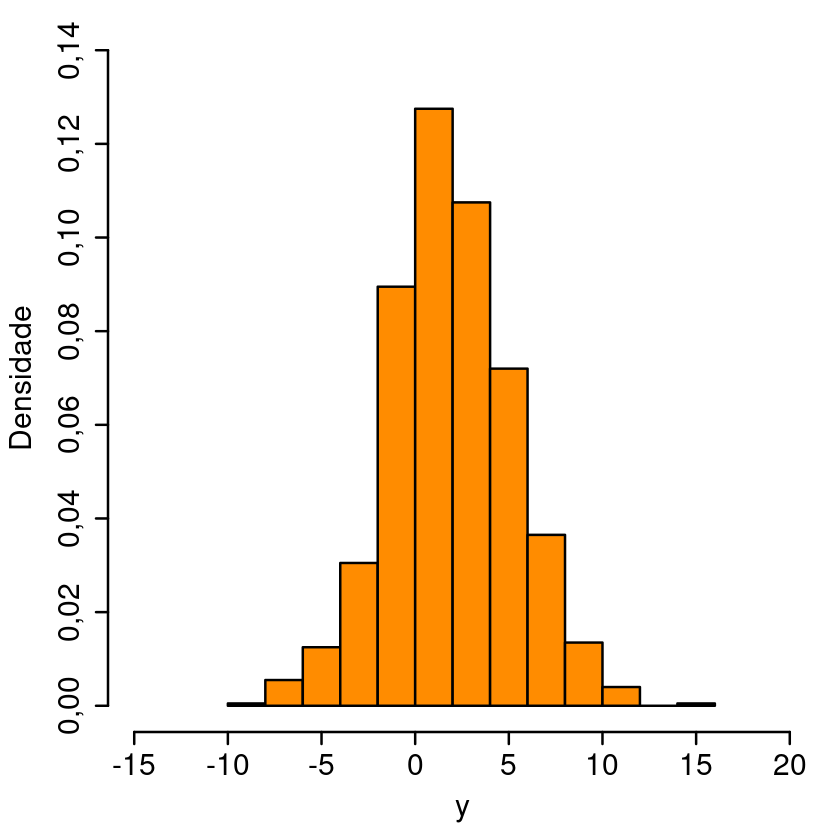

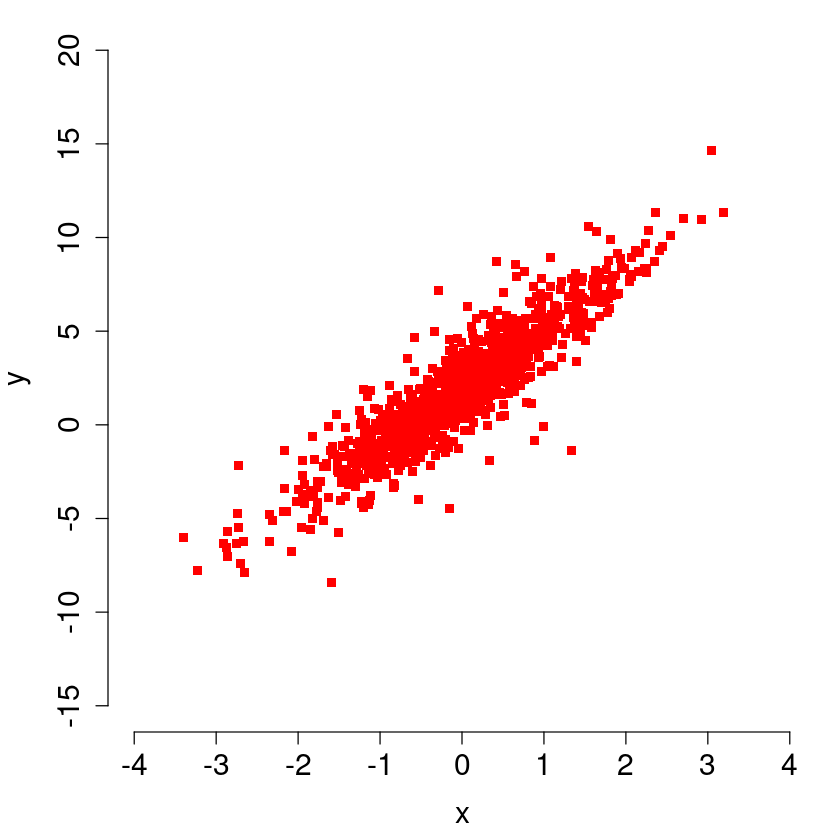

In [3]:
#===================================================================
# Histograma dos dados y e dispersão de x contra y.
#===================================================================
par(mfrow=c(1,1),lwd=2.0,cex.lab=1.5,cex.axis=1.5,lab=c(8,8,5),
    mar=c(4.5,4.5,1,1),cex.main=2.0,bty="n")
hist(y,main="",prob=T,lwd=2,col="darkorange",xlab=expression(y),
    ylab="Densidade",xlim=c(-15,20),ylim=c(0,0.14))
plot(x,y,pch=15,lwd=2,col="red",xlim=c(-4,4),ylim=c(-15,20),
    xlab=expression(x),ylab=expression(y))

In [4]:
#===================================================================
# Ajuste do modelo de regressão linear:
# y = beta_0 + beta_1*x + erro.
#===================================================================
ajuste <- lm(y ~ x)
print(summary(ajuste))


Call:
lm(formula = y ~ x)

Residuals:
    Min      1Q  Median      3Q     Max 
-7,3772 -0,7441 -0,0019  0,7275  6,0618 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)  2,00300    0,04237   47,28   <2e-16 ***
x            3,01742    0,04249   71,02   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0,001 ‘**’ 0,01 ‘*’ 0,05 ‘.’ 0,1 ‘ ’ 1

Residual standard error: 1,339 on 998 degrees of freedom
Multiple R-squared:  0,8348,	Adjusted R-squared:  0,8347 
F-statistic:  5044 on 1 and 998 DF,  p-value: < 2,2e-16



In [5]:
#===================================================================
# Análises dos resíduos.
#===================================================================
res       <- ajuste$residual
yajustado <- ajuste$fitted.values
print(mean(res))

[1] -1,176685e-17


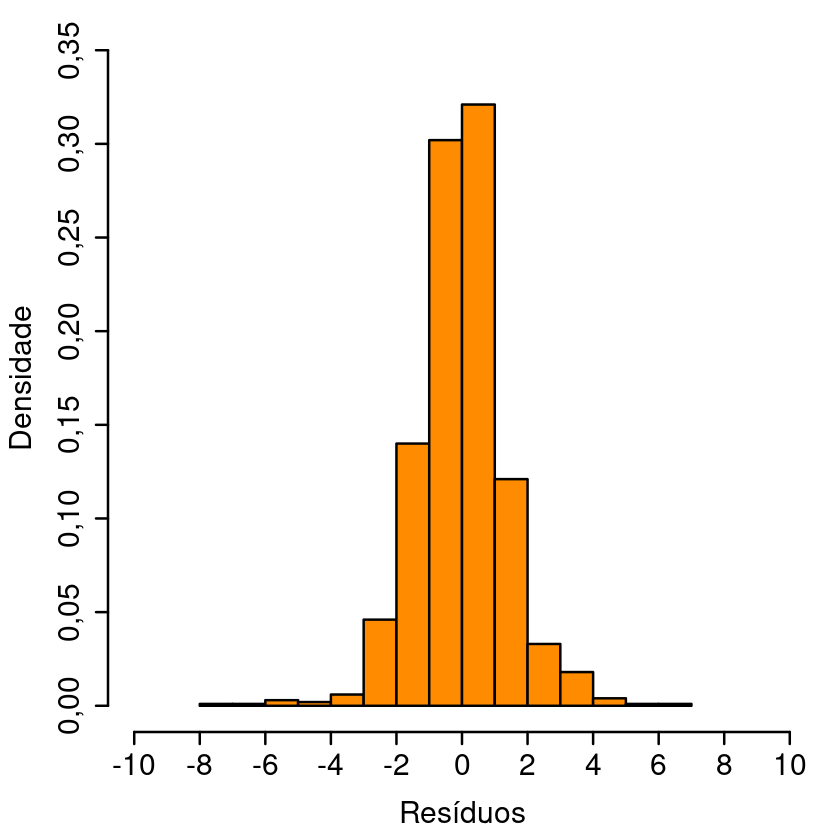

In [6]:
#===================================================================
# Histograma dos resíduos.
#===================================================================
par(mfrow=c(1,1),lwd=2.0,cex.lab=1.5,cex.axis=1.5,lab=c(8,8,5),
    mar=c(4.5,4.5,1,1),cex.main=2.0,bty="n")
hist(res,main="",prob=T,xlab="Resíduos",ylab="Densidade",lwd=2,
    col="darkorange",xlim=c(-10,10),ylim=c(0,0.35))

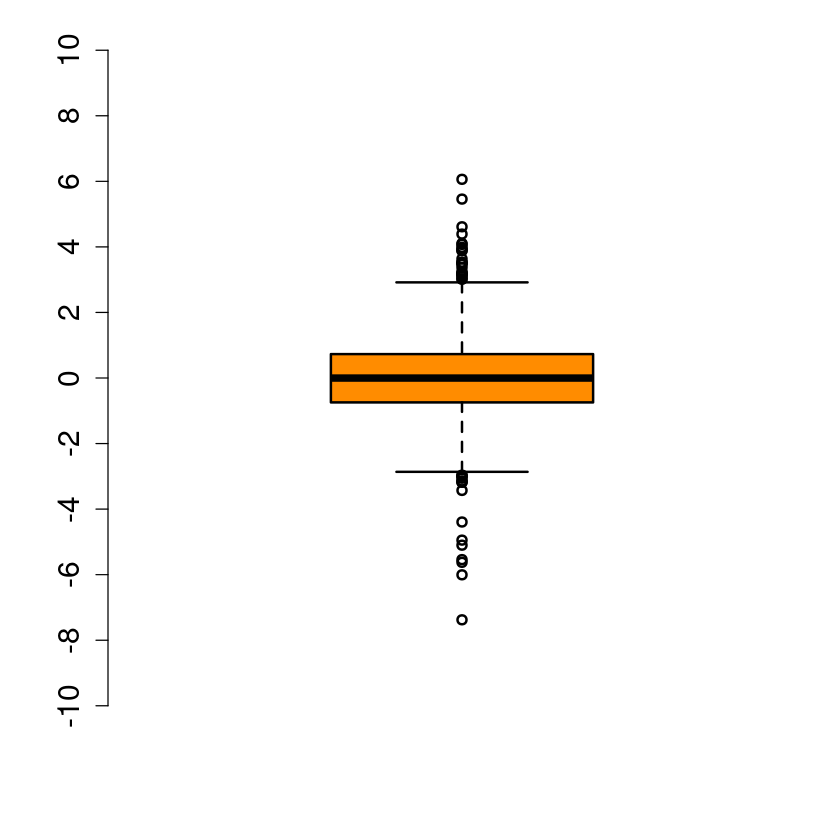

In [7]:
#===================================================================
# Boxplot dos resíduos.
#===================================================================
par(mfrow=c(1,1),lwd=2.0,cex.lab=1.5,cex.axis=1.5,lab=c(8,8,5),
    mar=c(4.5,4.5,1,1),cex.main=2.0,bty="n")
boxplot(res,ylim=c(-10,10),col="darkorange")

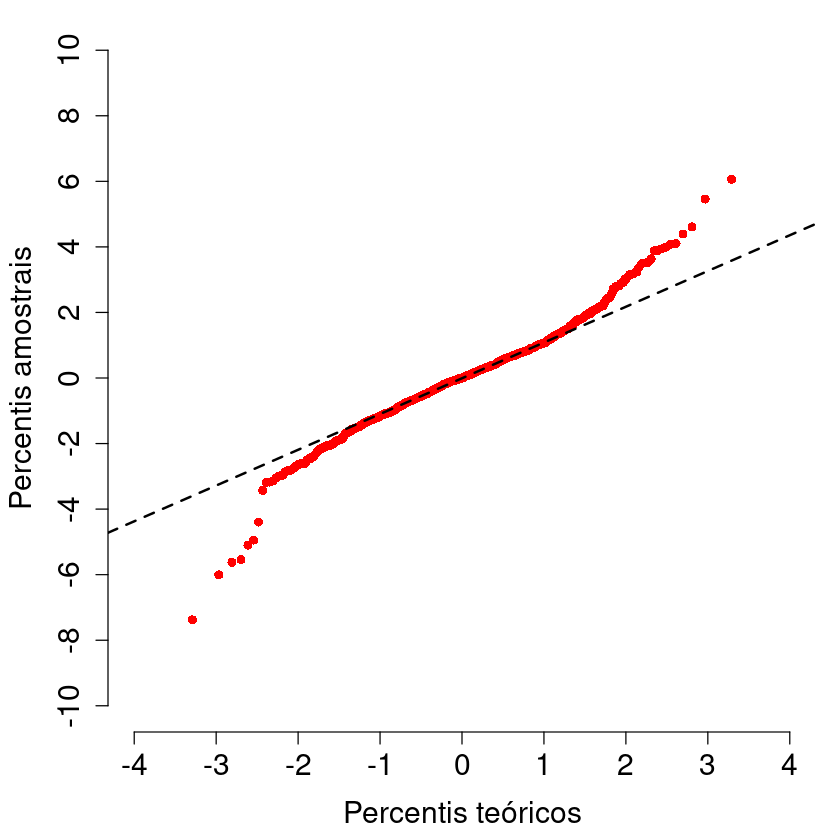

In [8]:
#===================================================================
# qq-norm dos resíduos.
#===================================================================
par(mfrow=c(1,1),lwd=2.0,cex.lab=1.5,cex.axis=1.5,lab=c(8,8,5),
    mar=c(4.5,4.5,1,1),cex.main=2.0,bty="n")
qqnorm(res,col="red",main="",xlab="Percentis teóricos",xlim=c(-4,4),
    ylim=c(-10,10),ylab="Percentis amostrais",pch=16,xpd=F)
qqline(res,lwd=2,bty="n",lty=2)

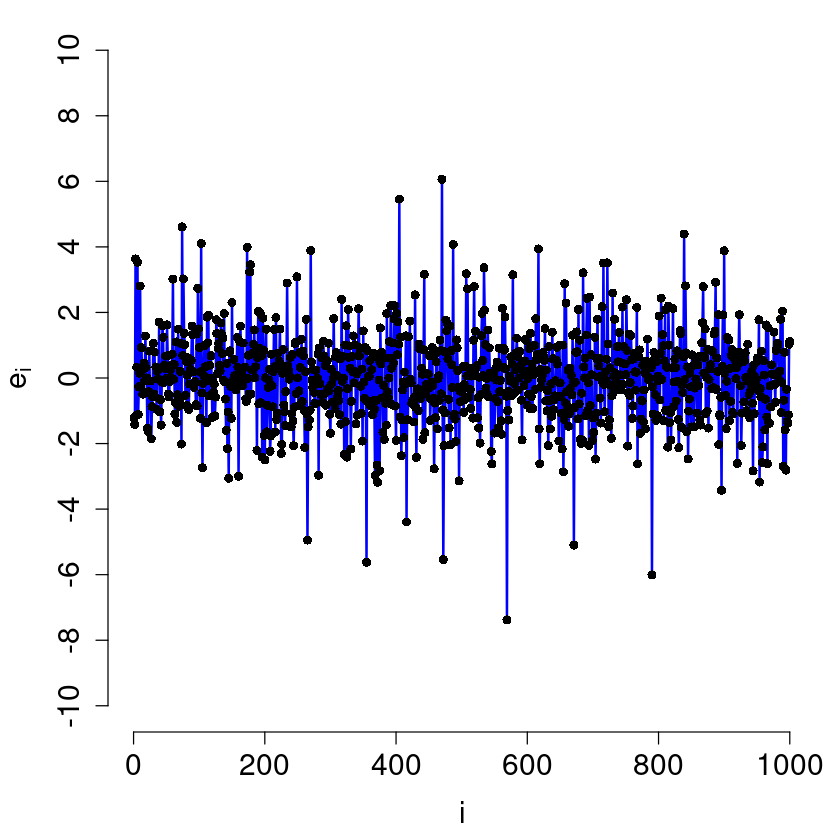

In [9]:
#===================================================================
# Resíduos ao longo dos índices (tempo).
#===================================================================
par(mfrow=c(1,1),lwd=2.0,cex.lab=1.5,cex.axis=1.5,lab=c(6,8,5),
    mar=c(4.5,4.5,1,1),cex.main=2.0,bty="n")
ts.plot(res,lwd=2,col="blue",ylim=c(-10,10),xlab=expression(i),
    ylab=expression(e[i])) 
points(res,pch=16,lwd=3,col=1)

[1] -1,239118e-17


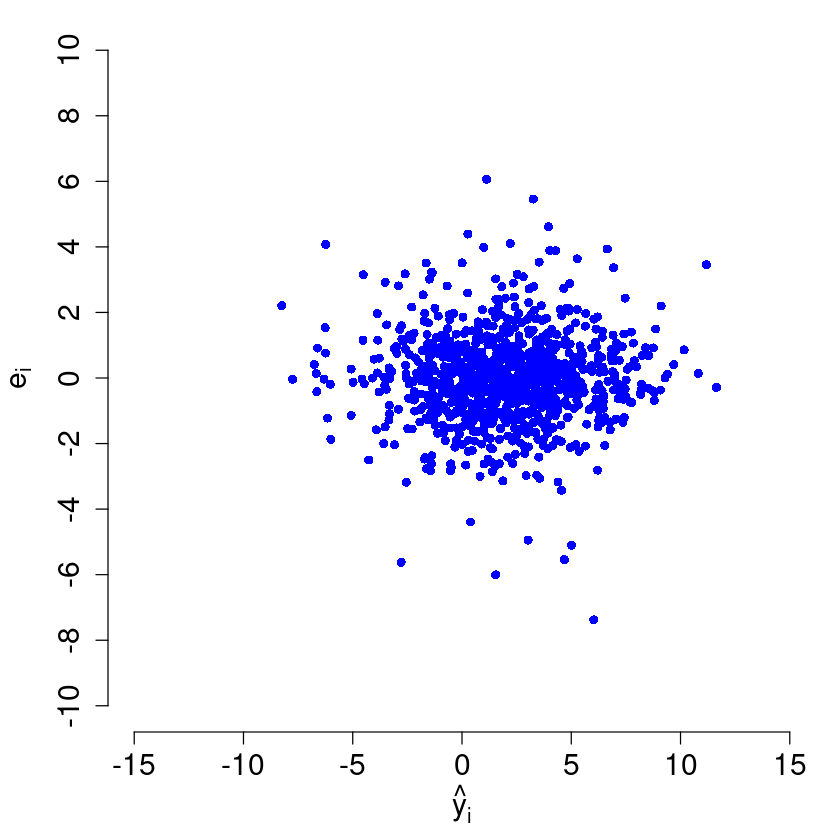

In [10]:
#===================================================================
# Dispersão entre valores ajustados e os resíduos.
#===================================================================
par(mfrow=c(1,1),lwd=2.0,cex.lab=1.5,cex.axis=1.5,lab=c(8,8,5),
    mar=c(4.5,4.5,1,1),cex.main=2.0,bty="n")
plot(yajustado,res,lwd=2,col="blue",xlim=c(-15,15),ylim=c(-10,10),
    pch=16,xlab=expression(hat(y)[i]),ylab=expression(e[i]))
print(cor(yajustado,res))

[1] -1,093794e-17


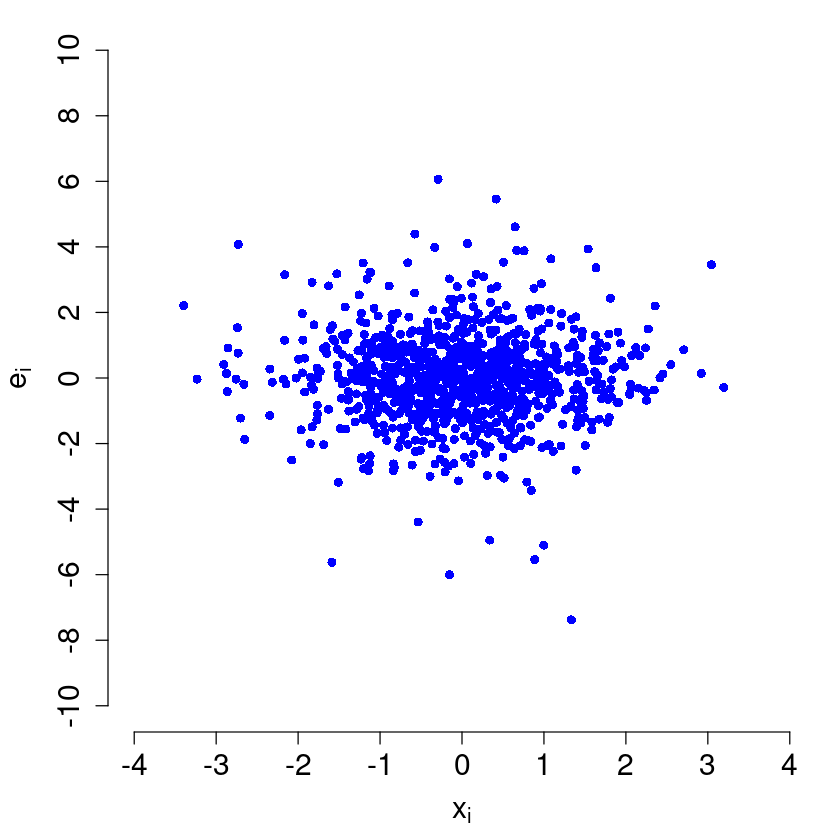

In [11]:
#===================================================================
# Dispersão entre valores da regressora e os resíduos.
#===================================================================
par(mfrow=c(1,1),lwd=2.0,cex.lab=1.5,cex.axis=1.5,lab=c(8,8,5),
    mar=c(4.5,4.5,1,1),cex.main=2.0,bty="n")
plot(x,res,lwd=2,col="blue",ylim=c(-10,10),xlim=c(-4,4),
    pch=16,xlab=expression(x[i]),ylab=expression(e[i]))
print(cor(x,res))

In [12]:
#===================================================================
# Qual o problema encontrado nas analises graficas?
#===================================================================

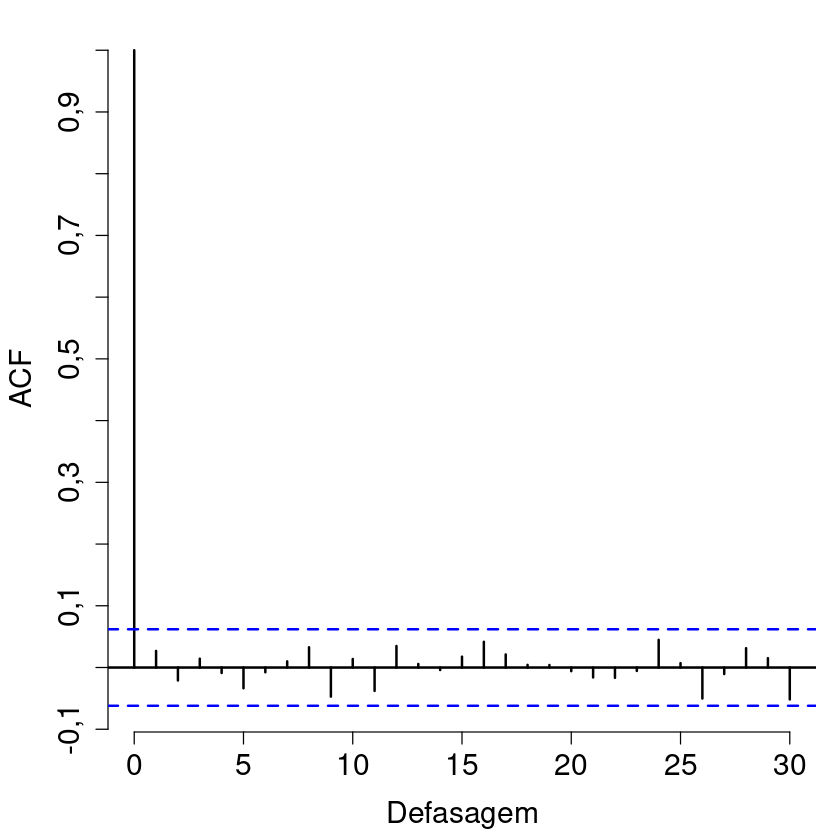

In [13]:
#===================================================================
# Verificando se os resíduos são correlacionados utilizando a função
# de autocorrelação amostral
#===================================================================
par(mfrow=c(1,1),lwd=2.0,cex.lab=1.5,cex.axis=1.5,lab=c(8,8,5),
    mar=c(4.5,4.5,1,1),cex.main=2.0,bty="n")
acf(res,lwd=2,col="black",main="",xlab="Defasagem",ylab="ACF",
   xpd=F)

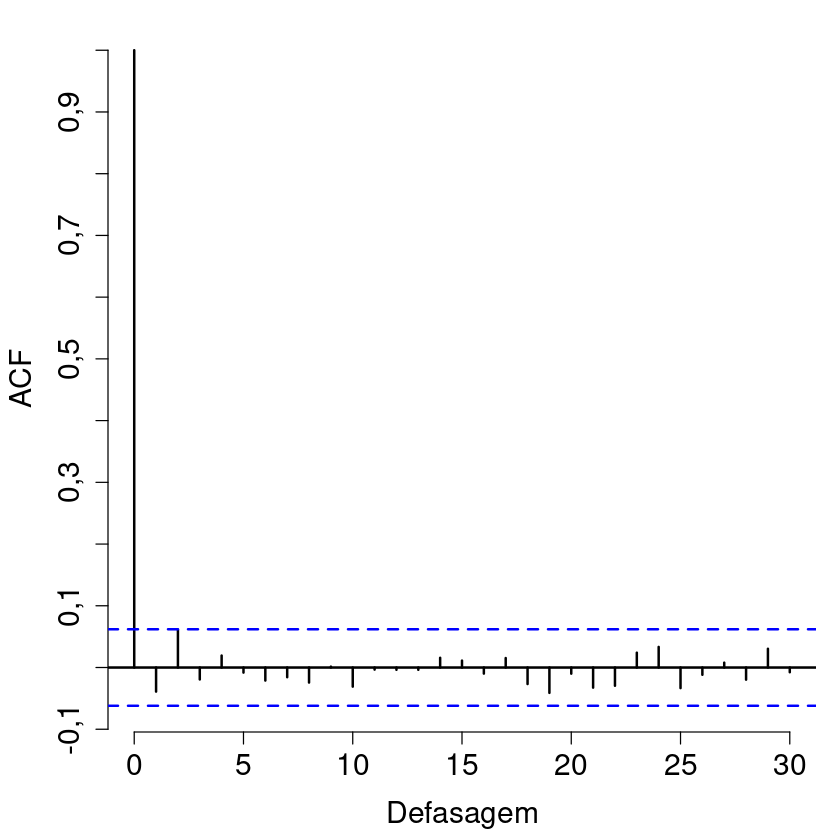

In [14]:
#===================================================================
# Verificando se os resíduos são correlacionados utilizando a função
# de autocorrelação amostral (quadrado dos resíduos).
# Homocedástico ou heterocedástico (ao longo das observações)?
#===================================================================
par(mfrow=c(1,1),lwd=2.0,cex.lab=1.5,cex.axis=1.5,lab=c(8,8,5),
    mar=c(4.5,4.5,1,1),cex.main=2.0,bty="n")
acf(res^2,lwd=2,col="black",main="",xlab="Defasagem",ylab="ACF",
   xpd=F)

In [15]:
#===================================================================
# Teste formal de normalidade
#===================================================================
# Teste parametrico
silence <- suppressPackageStartupMessages 
silence(library(tseries)) 
jarque.bera.test(res)


	Jarque Bera Test

data:  res
X-squared = 346,73, df = 2, p-value < 2,2e-16


In [16]:
#===================================================================
# Fim
#===================================================================